## Import Libraries

In [24]:
# Basic packages
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from scipy import stats; from scipy.stats import zscore, norm, randint
import matplotlib.style as style; style.use('fivethirtyeight')
from sklearn.impute import SimpleImputer
%matplotlib inline

# Label encoding
from sklearn.preprocessing import LabelEncoder

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

# Display settings
pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000

random_state = 44
np.random.seed(random_state)

## Load and review data

In [12]:
# Reading the data as dataframe and print the first five rows
vehicle_df = pd.read_csv('vehicle-1.csv')
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [13]:
vehicle_df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

## Attribute Information
<ul>
    <li>compactness: (average perim)^2/area</li>
    <li>circularity: (average radius)^2/area</li>
    <li>distance_circularity: area/(av.distance from border)^2</li>
    <li>radius_ratio: (max.rad-min.rad)/av.radius</li>
    <li>pr.axis_aspect_ratio: (minor axis)/(major axis)</li>
    <li>max.length_aspect_ratio: (length perp. max length)/(max length)</li>
    <li>scatter_ratio: (inertia about minor axis)/(inertia about major axis)</li>
    <li>elongatedness: area/(shrink width)^2</li>
    <li>pr.axis_rectangularity: area/(pr.axis length*pr.axis width)</li>
    <li>max.length_rectangularity: area/(max.length*length perp. to this)</li>
    <li>scaled_variance: (2nd order moment about minor axis)/area along major axis</li>
    <li>scaled_variance.1: (2nd order moment about major axis)/area along minor axis</li>
    <li>scaled_radius_of_gyration: (mavar+mivar)/area</li>
    <li>scaled_radius_of_gyration.1</li>
    <li>skewness_about: (3rd order moment about major axis)/sigma_min^3 major axis</li>
    <li>skewness_about.1: (3rd order moment about minor axis)/sigma_maj^3 minor axis</li>
    <li>skewness_about.2</li>
    <li>hollows_ratio: (area of hollows)/(area of bounding polygon)</li>
    <li>class: van, car, bus</li>
</ul>

## Get info of the dataframe columns

In [4]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

## Dataset shape 

In [6]:
vehicle_df.shape

(846, 19)

In [14]:
# Checking missing values in dataframe
vehicle_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

## Exploratory Data Analysis

<ul>
    <li>Get descriptive statistics including five point summary</li>
    <li>Comment on the types of variables in dataset and descriptive statistics observation</li>
    <li>Check unique values in class columns</li>
    <li>Check distribution of class column</li>
    <li>Check missing values in the dataframe and impute those missing values</li>
    <li>Univariate and Bivariate visualization: Looking at one feature at a time to understand how are the values are distributed, checking outliers and relation of the columns with class</li>
    <li>Handle outliers using SimpleImputer</li>
    <li>Multivariate visualization including correlation and scatterplot matrix. In the process identify the features to be taken further for the study</li>
    <li>Handle imbalance in no of observations in target(class) varable.</li>
</ul>    

### Five point summary of numerical attributes and check unique values in 'object' columns

In [15]:
# Five point summary
vehicle_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
compactness,846,NaN,NaN,NaN,93.6785,8.23447,73,87,93,100,119
circularity,841,NaN,NaN,NaN,44.8288,6.15217,33,40,44,49,59
distance_circularity,842,NaN,NaN,NaN,82.1105,15.7783,40,70,80,98,112
radius_ratio,840,NaN,NaN,NaN,168.888,33.5202,104,141,167,195,333
pr.axis_aspect_ratio,844,NaN,NaN,NaN,61.6789,7.89146,47,57,61,65,138
max.length_aspect_ratio,846,NaN,NaN,NaN,8.56738,4.60122,2,7,8,10,55
scatter_ratio,845,NaN,NaN,NaN,168.902,33.2148,112,147,157,198,265
elongatedness,845,NaN,NaN,NaN,40.9337,7.81619,26,33,43,46,61
pr.axis_rectangularity,843,NaN,NaN,NaN,20.5824,2.59293,17,19,20,23,29
max.length_rectangularity,846,NaN,NaN,NaN,147.999,14.5157,118,137,146,159,188


## Checking the distribution of class variable 

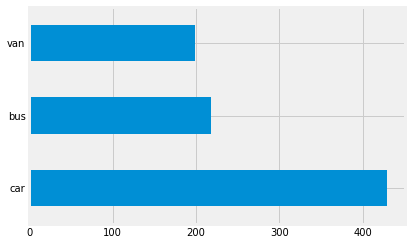

In [16]:
vehicle_df["class"].value_counts().plot(kind='barh')

In [18]:
display(vehicle_df['class'].value_counts(), vehicle_df['class'].value_counts(normalize = True)*100)

car    429
bus    218
van    199
Name: class, dtype: int64

car    50.709220
bus    25.768322
van    23.522459
Name: class, dtype: float64

In [20]:
replace_struc = {'car': 3, 'bus': 2, 'van': 1}
vehicle_df['class'] = vehicle_df['class'].map(replace_struc)
del replace_struc

#### Observation: Count of observations with class car is much more(imbalanced) with respect to other classes. car represents about 50.7% of the total values in class variable, bus about 25.8% and van about 23.5%.

In [22]:
# Check missing values in the dataframe
vehicle_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

### Using SimpleImputer to handle missing values 

In [26]:
null_columns = vehicle_df.columns[vehicle_df.isnull().any()]; columns = list(vehicle_df.columns)

print('Descriptive Stats before imputation for columns with missing values: \n', '--'*35)
display(vehicle_df[null_columns].describe().T)

# Using SimpleImputer to fill missing values by median
impute = SimpleImputer(missing_values = np.nan, strategy = 'median', verbose = 1)
vehicle = pd.DataFrame(impute.fit_transform(vehicle_df), columns = columns)

print('Descriptive Stats after imputation: \n', '--'*35)
display(vehicle[null_columns].describe().T)

del null_columns

Descriptive Stats before imputation for columns with missing values: 
 ----------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
circularity,841.0,44.828775,6.152172,33.0,40.0,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.0,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.0,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.0,61.0,65.0,138.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.0,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.0,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.0,20.0,23.0,29.0
scaled_variance,843.0,188.631079,31.411004,130.0,167.0,179.0,217.0,320.0
scaled_variance.1,844.0,439.494076,176.666903,184.0,318.0,363.5,587.0,1018.0
scaled_radius_of_gyration,844.0,174.709716,32.584808,109.0,149.0,173.5,198.0,268.0


Descriptive Stats after imputation: 
 ----------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
circularity,846.0,44.823877,6.134272,33.0,40.00,44.0,49.00,59.0
distance_circularity,846.0,82.100473,15.741569,40.0,70.00,80.0,98.00,112.0
radius_ratio,846.0,168.874704,33.401356,104.0,141.00,167.0,195.00,333.0
pr.axis_aspect_ratio,846.0,61.677305,7.882188,47.0,57.00,61.0,65.00,138.0
scatter_ratio,846.0,168.887707,33.197710,112.0,147.00,157.0,198.00,265.0
elongatedness,846.0,40.936170,7.811882,26.0,33.00,43.0,46.00,61.0
pr.axis_rectangularity,846.0,20.580378,2.588558,17.0,19.00,20.0,23.00,29.0
scaled_variance,846.0,188.596927,31.360427,130.0,167.00,179.0,217.00,320.0
scaled_variance.1,846.0,439.314421,176.496341,184.0,318.25,363.5,586.75,1018.0
scaled_radius_of_gyration,846.0,174.706856,32.546277,109.0,149.00,173.5,198.00,268.0


#### Observation - After imputation
No significant change in median in dataset, gradual right shift of mean can be observed.

### Function to plot boxplot and distplot with/without outliers

In [60]:
# Functions that will help us with EDA plot
def odp_plots(df, col):
    f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 7.2))
    
    # Boxplot to check outliers
    sns.boxplot(x = col, data = df, ax = ax1, orient = 'v', color = 'darkslategrey')
    
    # Distribution plot with outliers
    sns.distplot(df[col], ax = ax2, color = 'teal', fit = norm).set_title(f'{col} with outliers')
    
    # Removing outliers, but in a new dataframe
    upperbound, lowerbound = np.percentile(df[col], [1, 99])
    y = pd.DataFrame(np.clip(df[col], upperbound, lowerbound))
    
    # Distribution plot without outliers
    sns.distplot(y[col], ax = ax3, color = 'tab:orange', fit = norm).set_title(f'{col} without outliers')
    
    kwargs = {'fontsize':14, 'color':'black'}
    ax1.set_title(col + ' Boxplot Analysis', **kwargs)
    ax1.set_xlabel('Box', **kwargs)
    ax1.set_ylabel(col + ' Values', **kwargs)

    return plt.show()

### Function to plot distribution of target variable(class)

In [54]:
# function for ploting distribution of variables with target
def target_plot(df, col1, col2, col3, target = 'class'):
    f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 7.2))
    f.suptitle(f'Distribution for Car, Bus, Van for {col1.capitalize()}, {col2.capitalize()}, {col3.capitalize()}', 
               fontsize = 14)
    # Distribution for col1 considering outliers
    sns.distplot(df[(df[target] == 3)][col1], color = 'c', ax = ax1, hist = False, 
                 label = 'Car').set_title(f'{col1.capitalize()}', fontsize=14,
            fontstyle='italic', fontweight='bold')
    sns.distplot(df[(df[target] == 2)][col1], color = 'b', ax = ax1, hist = False, 
                 label = 'Bus').set_title(f'{col1.capitalize()}', fontsize=14,
            fontstyle='italic', fontweight='bold')
    sns.distplot(df[(df[target] == 1)][col1], color = 'm', ax = ax1, hist = False, 
                 label = 'Van').set_title(f'{col1.capitalize()}', fontsize=14,
            fontstyle='italic', fontweight='bold')

    # Distribution for col2 considering outliers
    sns.distplot(df[(df[target] == 3)][col2], color = 'c', ax = ax2, hist = False, 
                 label = 'Car').set_title(f'{col2.capitalize()}', fontsize=14,
            fontstyle='italic', fontweight='bold')
    sns.distplot(df[(df[target] == 2)][col2], color = 'b', ax = ax2, hist = False, 
                 label = 'Bus').set_title(f'{col2.capitalize()}', fontsize=14,
            fontstyle='italic', fontweight='bold')
    sns.distplot(df[(df[target] == 1)][col2], color = 'm', ax = ax2, hist = False, 
                 label = 'Van').set_title(f'{col2.capitalize()}', fontsize=14,
            fontstyle='italic', fontweight='bold')

    # Distribution for col3 considering outliers
    sns.distplot(df[(df[target] == 3)][col3], color = 'c', ax = ax3, hist = False, 
                 label = 'Car').set_title(f'{col3.capitalize()}', fontsize=14,
            fontstyle='italic', fontweight='bold')
    sns.distplot(df[(df[target] == 2)][col3], color = 'b', ax = ax3, hist = False, 
                 label = 'Bus').set_title(f'{col3.capitalize()}', fontsize=14,
            fontstyle='italic', fontweight='bold')
    sns.distplot(df[(df[target] == 1)][col3], color = 'm', ax = ax3, hist = False, 
                 label = 'Van').set_title(f'{col3.capitalize()}', fontsize=14,
            fontstyle='italic', fontweight='bold')
    return plt.show()

### Function to plot correlations and extract variables above threshold value

In [33]:
# Correlation matrix for all variables
def correlation_matrix(df, threshold = 0.8):
    corr = df.corr()
    mask = np.zeros_like(corr, dtype = np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize = (15, 7.2))
    cmap = sns.diverging_palette(220, 10, as_cmap = True)
    sns.heatmap(corr, mask = mask, cmap = cmap, square = True, linewidths = .5, cbar_kws = {"shrink": .5})#, annot = True)
    ax.set_title('Correlation Matrix of Data')

    # Filter for correlation value greater than threshold
    sort = corr.abs().unstack()
    sort = sort.sort_values(kind = "quicksort", ascending = False)
    display(sort[(sort > threshold) & (sort < 1)])

### Function to plot PCA resultants

In [34]:
# Helper function for PCA plots
def pca_plots(df, col1, col2, xlabel, ylabel, ax):
    ax.set_xlabel(xlabel); ax.set_ylabel(ylabel)
    ax.set_title(f'{xlabel} vs {ylabel}', fontsize = 14)
    targets = [3, 2, 1]; colors = ['r', 'g', 'b']
    for target, color in zip(targets, colors):
        indicesToKeep = df['class'] == target
        ax.scatter(df.loc[indicesToKeep, col1], df.loc[indicesToKeep, col2], c = color, s = 50)
    ax.legend(targets)

### Function to plot learning curve

In [35]:
# Helper function to plot learning curve
def plot_learning_curve(estimator, X, y,  ax, ylim = None, cv = None, n_jobs = 1,
                        train_sizes = np.linspace(.1, 1.0, 5), name = 'Naive Bayes \n Principal Compoents Learning Curve'):    
    if ylim is not None:
        plt.ylim(*ylim)
        
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv = cv, n_jobs = n_jobs, 
                                                            train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)

    ax.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                     alpha = 0.1, color = '#ff9124')
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                     alpha = 0.1, color = '#2492ff')

    ax.plot(train_sizes, train_scores_mean, 'o-', color = '#ff9124', label = 'Training score')
    ax.plot(train_sizes, test_scores_mean, 'o-', color ='#2492ff', label = 'Cross-validation score')
    ax.set_title(name, fontsize = 14)
    ax.set_xlabel('Training size')
    ax.set_ylabel('Score')
    ax.grid(True)
    ax.legend(loc = 'best')

### Univariate and Bivariate Visualization

In this section, we will plot boxplot and distplot with/without outliers of all the independent variables. 
Also, we will learn about their relationships with target variable.

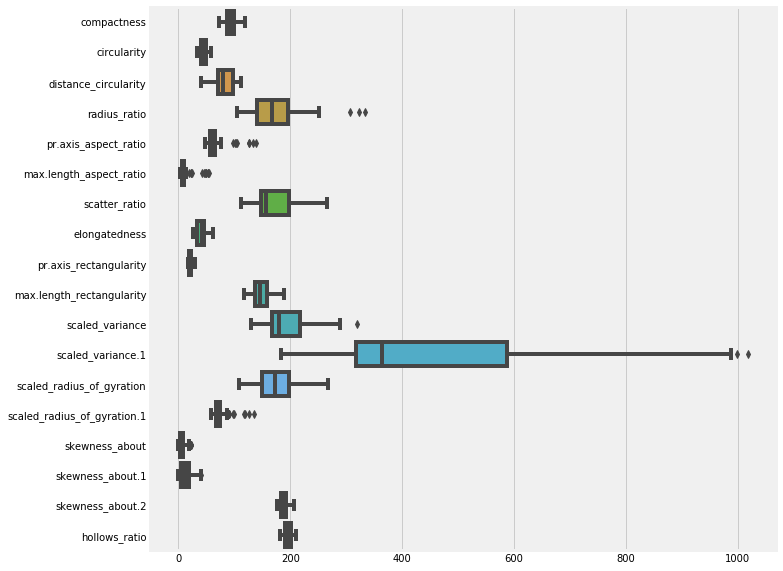

In [41]:
# A quick check to find columns that contain outliers
fig = plt.figure(figsize = (10, 10))
ax = sns.boxplot(data = vehicle.iloc[:, 0:18], orient = 'h')

Radius_ratio column --------------------------------------------------------------------------------
no of records with outliers values: 3


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
37,90.0,48.0,86.0,306.0,126.0,49.0,153.0,44.0,19.0,156.0,272.0,346.0,200.0,118.0,0.0,15.0,185.0,194.0,1.0
135,89.0,47.0,83.0,322.0,133.0,48.0,158.0,43.0,20.0,163.0,229.0,364.0,176.0,97.0,0.0,14.0,184.0,194.0,1.0
388,94.0,47.0,85.0,333.0,138.0,49.0,155.0,43.0,19.0,155.0,320.0,354.0,187.0,135.0,12.0,9.0,188.0,196.0,1.0


EDA for Radius_ratio column --------------------------------------------------------------------------------


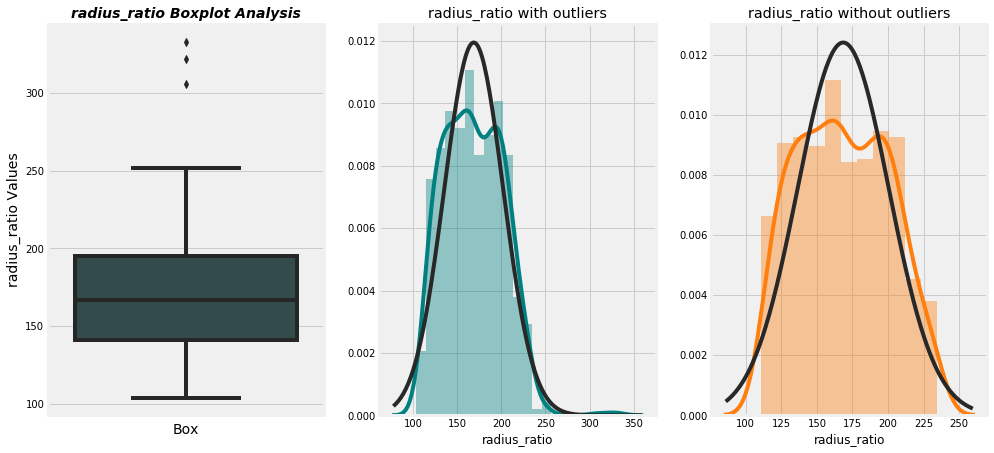

Pr.axis_aspect_ratio column --------------------------------------------------------------------------------
no of records with outliers values: 8


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,2.0
37,90.0,48.0,86.0,306.0,126.0,49.0,153.0,44.0,19.0,156.0,272.0,346.0,200.0,118.0,0.0,15.0,185.0,194.0,1.0
100,82.0,45.0,66.0,252.0,126.0,52.0,148.0,45.0,19.0,144.0,237.0,326.0,185.0,119.0,1.0,1.0,181.0,185.0,2.0
135,89.0,47.0,83.0,322.0,133.0,48.0,158.0,43.0,20.0,163.0,229.0,364.0,176.0,97.0,0.0,14.0,184.0,194.0,1.0
291,89.0,45.0,81.0,246.0,102.0,43.0,155.0,44.0,20.0,160.0,200.0,347.0,177.0,90.0,9.0,17.0,183.0,192.0,1.0


EDA for Pr.axis_aspect_ratio column --------------------------------------------------------------------------------


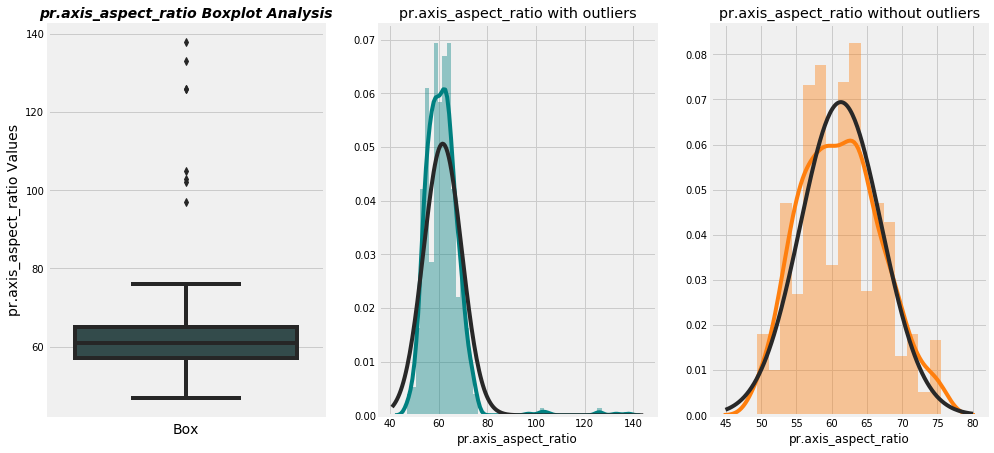

Max.length_aspect_ratio column --------------------------------------------------------------------------------
no of records with outliers values: 13


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,2.0
37,90.0,48.0,86.0,306.0,126.0,49.0,153.0,44.0,19.0,156.0,272.0,346.0,200.0,118.0,0.0,15.0,185.0,194.0,1.0
100,82.0,45.0,66.0,252.0,126.0,52.0,148.0,45.0,19.0,144.0,237.0,326.0,185.0,119.0,1.0,1.0,181.0,185.0,2.0
127,85.0,41.0,66.0,155.0,65.0,22.0,149.0,45.0,19.0,139.0,173.0,330.0,155.0,75.0,6.0,16.0,184.0,191.0,2.0
135,89.0,47.0,83.0,322.0,133.0,48.0,158.0,43.0,20.0,163.0,229.0,364.0,176.0,97.0,0.0,14.0,184.0,194.0,1.0


EDA for Max.length_aspect_ratio column --------------------------------------------------------------------------------


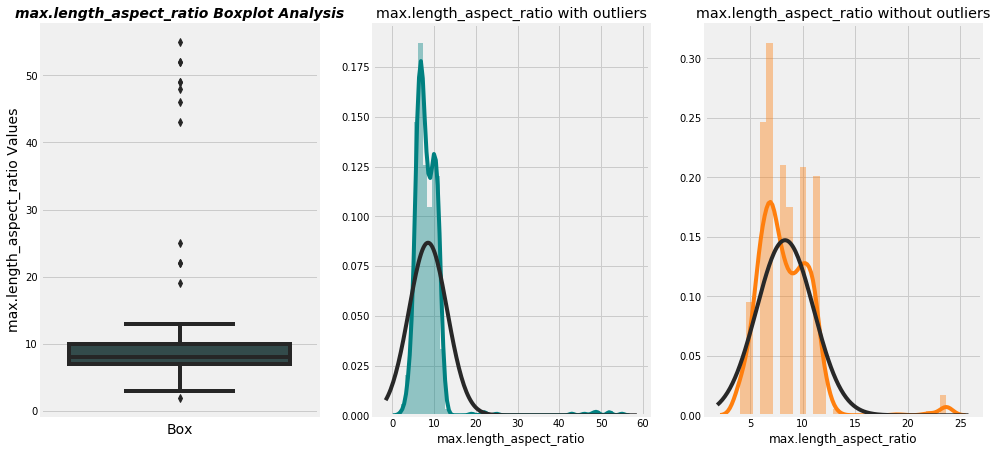

Scaled_variance column --------------------------------------------------------------------------------
no of records with outliers values: 1


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
388,94.0,47.0,85.0,333.0,138.0,49.0,155.0,43.0,19.0,155.0,320.0,354.0,187.0,135.0,12.0,9.0,188.0,196.0,1.0


EDA for Scaled_variance column --------------------------------------------------------------------------------


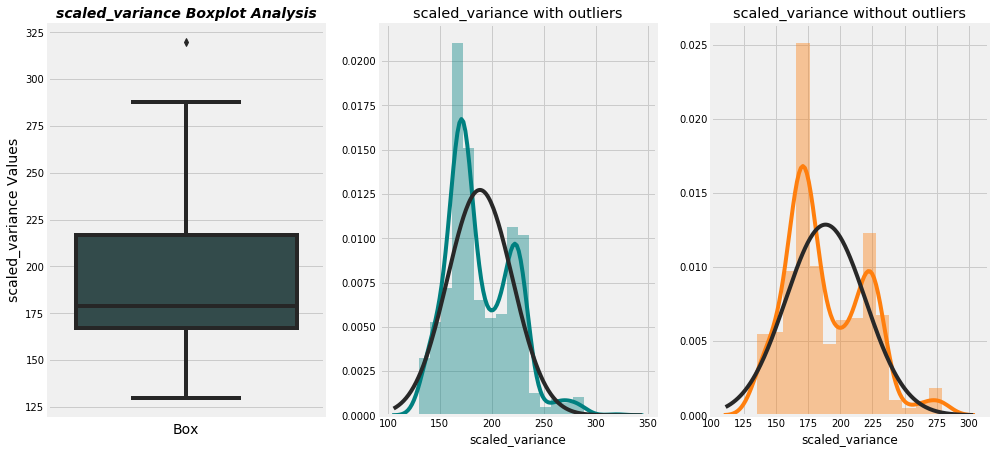

Scaled_variance.1 column --------------------------------------------------------------------------------
no of records with outliers values: 2


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
85,110.0,58.0,106.0,180.0,51.0,6.0,261.0,26.0,28.0,171.0,278.0,998.0,257.0,83.0,9.0,13.0,181.0,182.0,2.0
835,111.0,58.0,105.0,183.0,51.0,6.0,265.0,26.0,29.0,174.0,285.0,1018.0,255.0,85.0,4.0,8.0,181.0,183.0,2.0


EDA for Scaled_variance.1 column --------------------------------------------------------------------------------


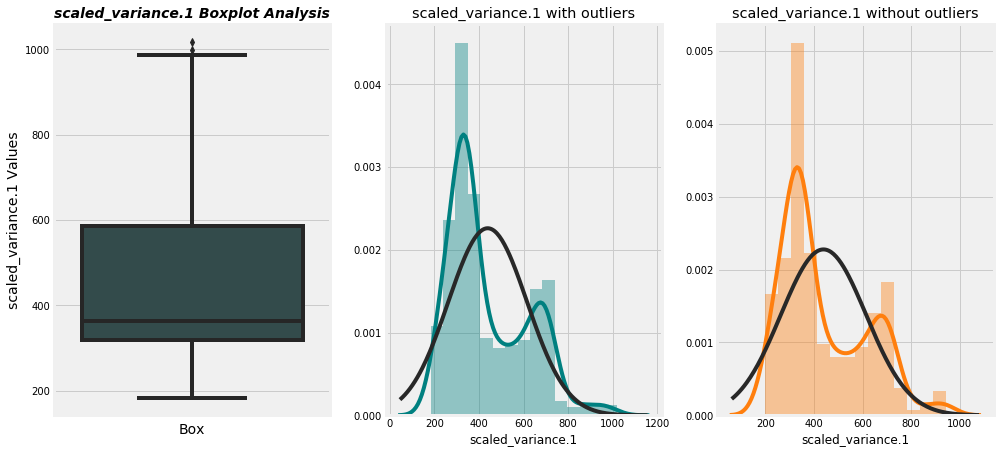

Scaled_radius_of_gyration.1 column --------------------------------------------------------------------------------
no of records with outliers values: 15


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,2.0
37,90.0,48.0,86.0,306.0,126.0,49.0,153.0,44.0,19.0,156.0,272.0,346.0,200.0,118.0,0.0,15.0,185.0,194.0,1.0
47,85.0,42.0,66.0,122.0,54.0,6.0,148.0,46.0,19.0,141.0,172.0,317.0,174.0,88.0,6.0,14.0,180.0,182.0,2.0
79,89.0,44.0,68.0,113.0,50.0,7.0,150.0,45.0,19.0,147.0,171.0,328.0,189.0,88.0,6.0,5.0,179.0,182.0,2.0
100,82.0,45.0,66.0,252.0,126.0,52.0,148.0,45.0,19.0,144.0,237.0,326.0,185.0,119.0,1.0,1.0,181.0,185.0,2.0


EDA for Scaled_radius_of_gyration.1 column --------------------------------------------------------------------------------


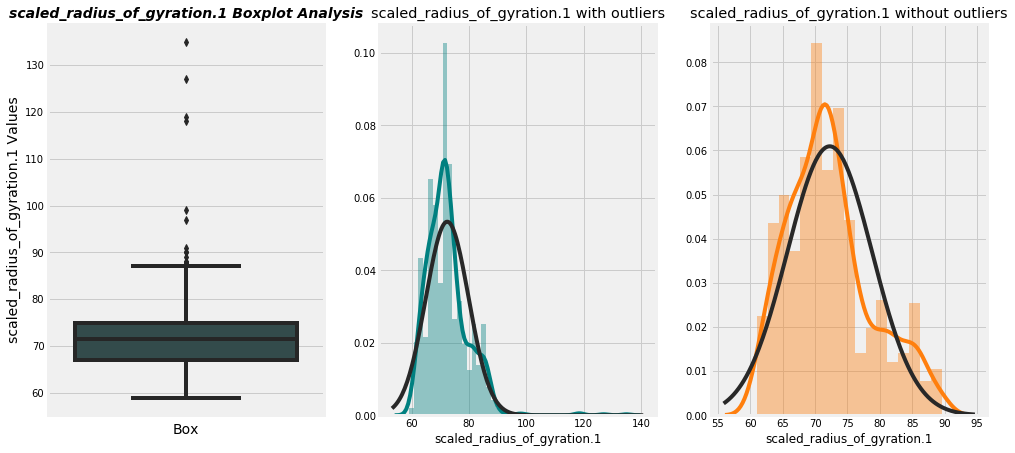

Skewness_about column --------------------------------------------------------------------------------
no of records with outliers values: 12


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
44,119.0,54.0,106.0,220.0,65.0,12.0,213.0,31.0,24.0,167.0,223.0,675.0,232.0,66.0,20.0,1.0,192.0,202.0,3.0
113,88.0,35.0,50.0,121.0,58.0,5.0,114.0,59.0,17.0,122.0,132.0,192.0,138.0,74.0,21.0,4.0,182.0,187.0,3.0
123,90.0,36.0,57.0,130.0,57.0,6.0,121.0,56.0,17.0,127.0,137.0,216.0,132.0,68.0,22.0,23.0,190.0,195.0,3.0
190,97.0,48.0,94.0,198.0,63.0,9.0,181.0,36.0,21.0,155.0,200.0,494.0,189.0,64.0,20.0,11.0,199.0,203.0,3.0
346,117.0,52.0,110.0,228.0,65.0,12.0,212.0,31.0,24.0,163.0,228.0,668.0,220.0,66.0,21.0,25.0,194.0,205.0,3.0


EDA for Skewness_about column --------------------------------------------------------------------------------


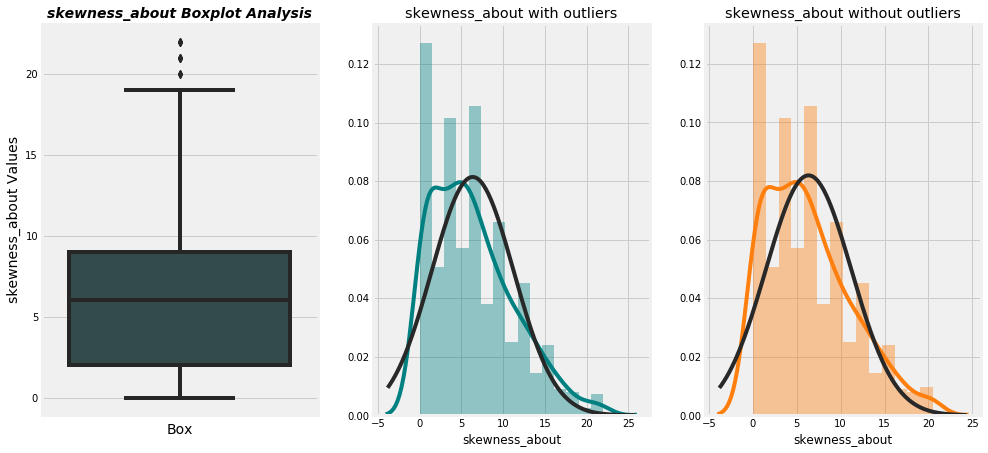

Skewness_about.1 column --------------------------------------------------------------------------------
no of records with outliers values: 1


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
132,97.0,42.0,101.0,186.0,59.0,9.0,186.0,36.0,22.0,138.0,208.0,511.0,168.0,67.0,7.0,41.0,194.0,206.0,3.0


EDA for Skewness_about.1 column --------------------------------------------------------------------------------


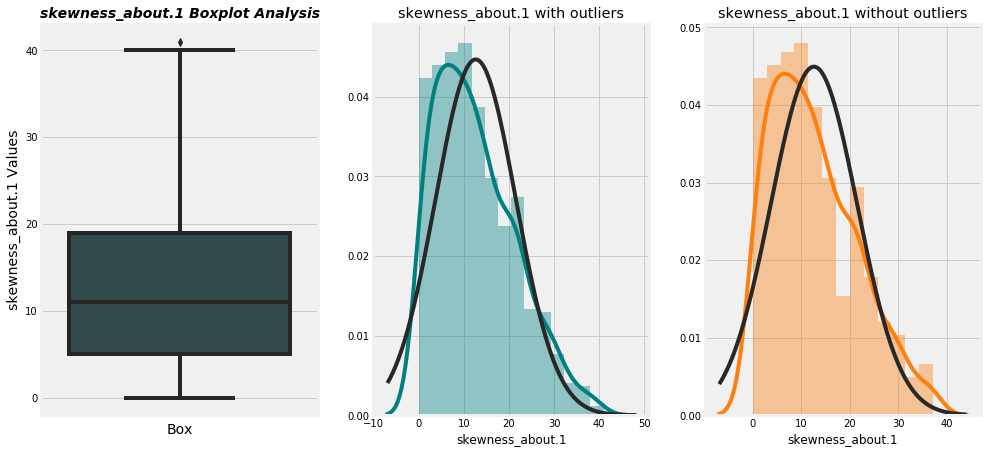

In [59]:
# Outlier, distribution for columns with outliers
boxplotcolumns = ['radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scaled_variance', 'scaled_variance.1',
                  'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1']
for cols in boxplotcolumns:
    Q3 = vehicle[cols].quantile(0.75)
    Q1 = vehicle[cols].quantile(0.25)
    IQR = Q3 - Q1

    print(f'{cols.capitalize()} column', '--'*40)
    count = len(vehicle.loc[(vehicle[cols] < (Q1 - 1.5 * IQR)) | (vehicle[cols] > (Q3 + 1.5 * IQR))])
    print(f'no of records with outliers values: {count}')
    
    display(vehicle.loc[(vehicle[cols] < (Q1 - 1.5 * IQR)) | (vehicle[cols] > (Q3 + 1.5 * IQR))].head())
    print(f'EDA for {cols.capitalize()} column', '--'*40)
    odp_plots(vehicle, cols)

del cols, IQR, boxplotcolumns

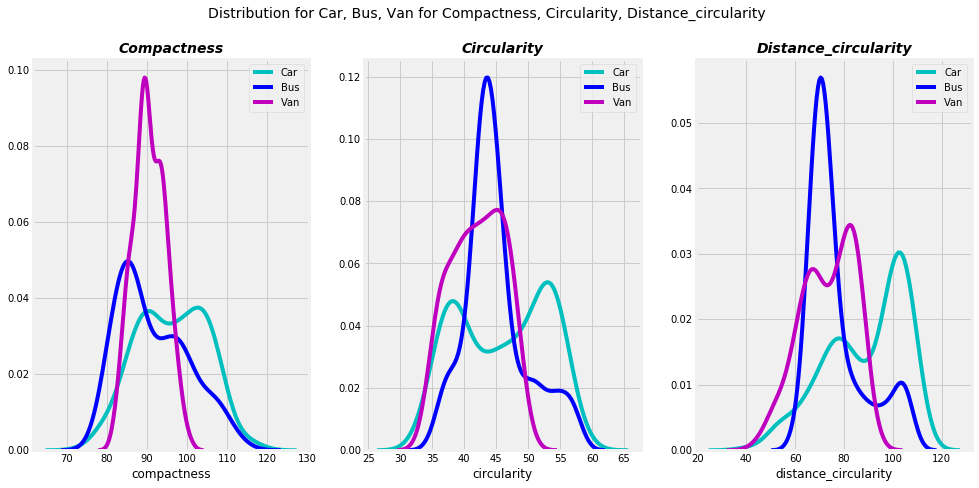

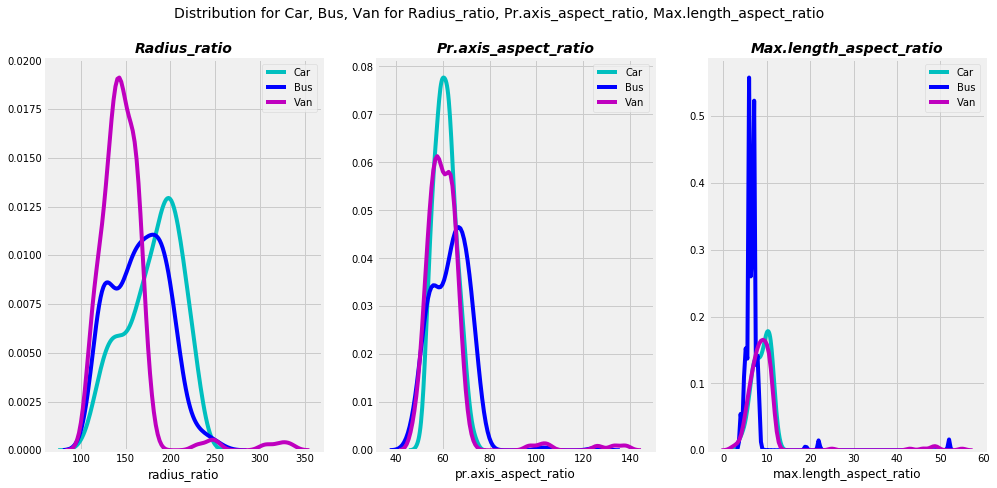

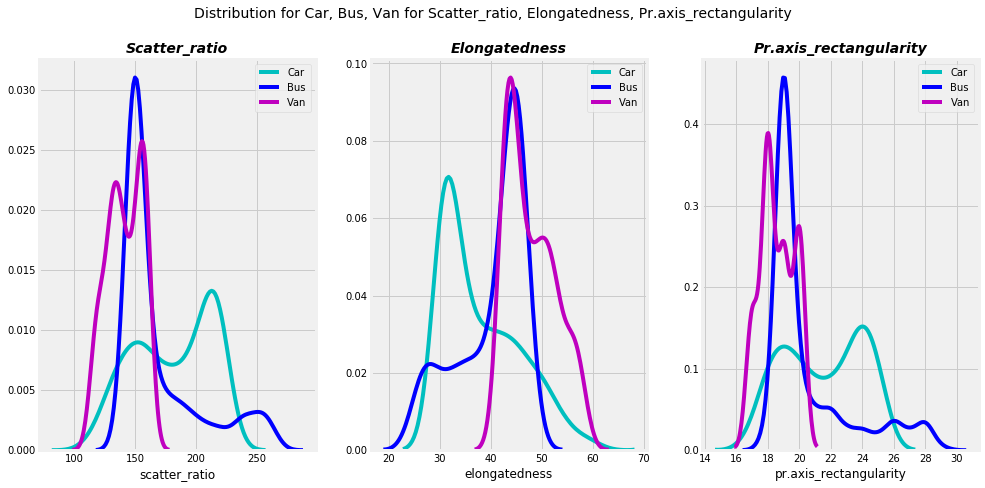

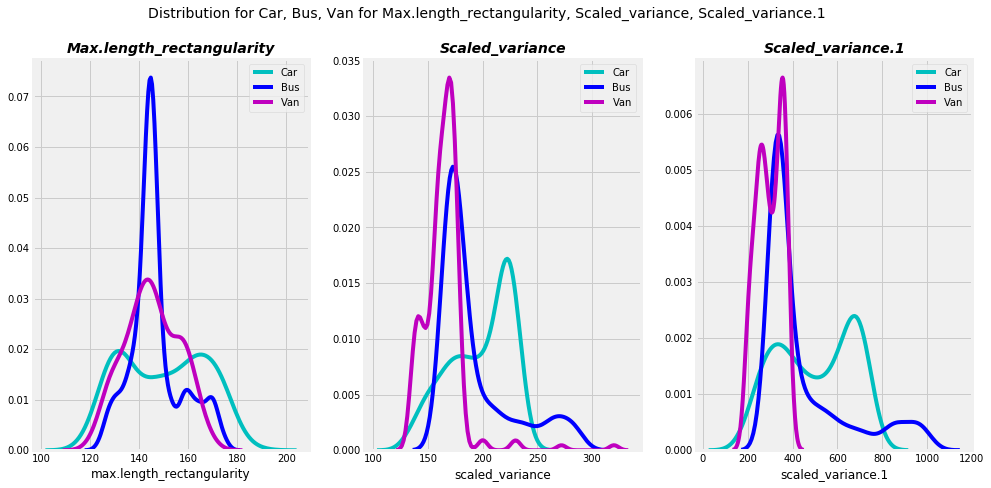

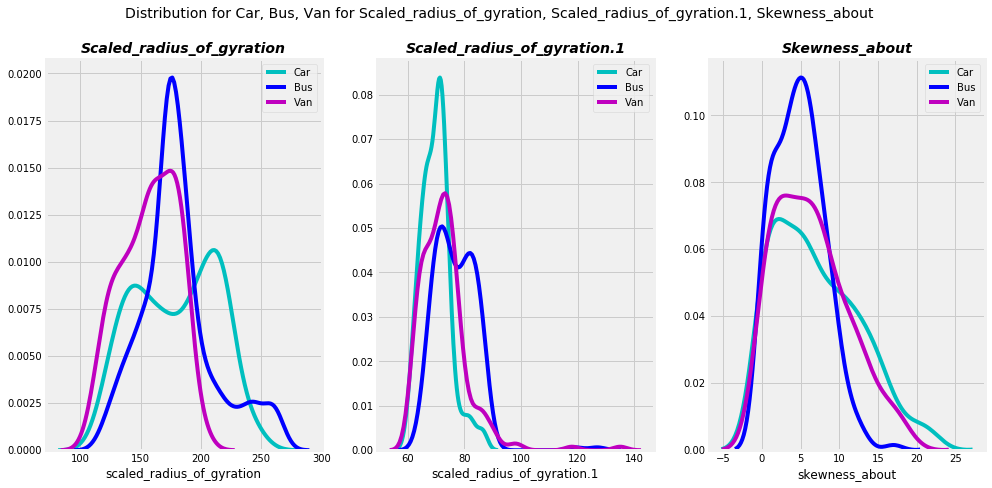

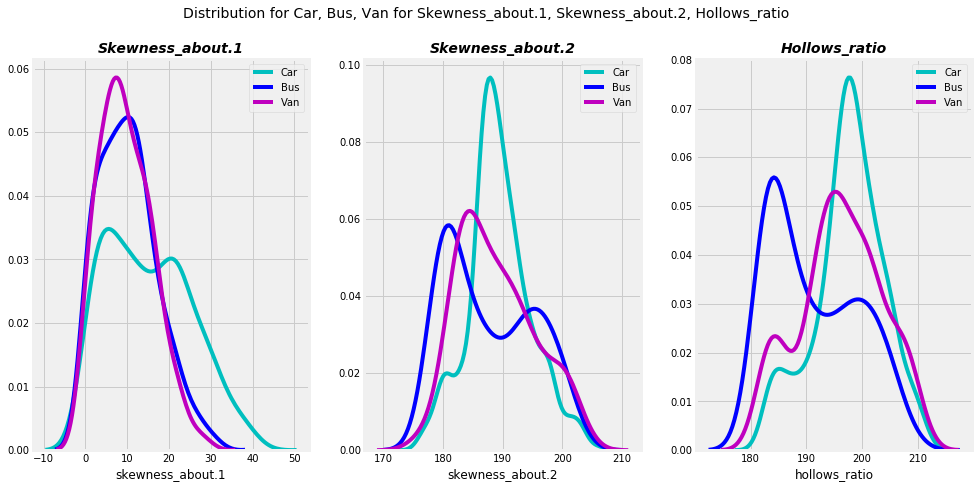

In [55]:
# Distribution of col by target variable
target_plot(vehicle, 'compactness', 'circularity', 'distance_circularity')
target_plot(vehicle, 'radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio')
target_plot(vehicle, 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity')
target_plot(vehicle, 'max.length_rectangularity', 'scaled_variance', 'scaled_variance.1')
target_plot(vehicle, 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about')
target_plot(vehicle, 'skewness_about.1', 'skewness_about.2', 'hollows_ratio')

#### Observation 6 - Comments after checking outliers and distribution 

<ul>
   <li> Used box plot for the features of the vehicle dataframe. Found that radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scaled_variance, scaled_variance.1, scaled_radius_of_gyration.1, skewness_about, skewness_about.1 columns has outliers.</li>
   <li>Used quantile method to check outliers in these column. It appears that scaled_radius_of_gyration.1 has maximum outliers around 15 of them, which represents about 1.77% of number of rows.</li>
   <li>It appears that removing outliers below 25% percentile and above 75% percentile will bring most of the columns to almost normal distribution. That would mean losing around 1.77% of the data.</li>
</ul>
Let's not to that, rather replace these outliers with null values and then replace those nulls with median values to avoid losing data.

### Handling outliers using SimpleImputer 

In [63]:
vehicle_im.isnull().sum()

compactness                     0
circularity                     0
distance_circularity            0
radius_ratio                    3
pr.axis_aspect_ratio            8
max.length_aspect_ratio        13
scatter_ratio                   0
elongatedness                   0
pr.axis_rectangularity          0
max.length_rectangularity       0
scaled_variance                 1
scaled_variance.1               2
scaled_radius_of_gyration       0
scaled_radius_of_gyration.1    15
skewness_about                 12
skewness_about.1                1
skewness_about.2                0
hollows_ratio                   0
class                           0
dtype: int64

In [61]:
# Removing outliers with upper and lower percentile values being 75 and 25, respectively
vehicle_im = vehicle.copy(deep = True)
outliers_cols = ['radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scaled_variance', 'scaled_variance.1',
           'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1']

for col in outliers_cols:
    Q3 = vehicle_im[col].quantile(0.75)
    Q1 = vehicle_im[col].quantile(0.25)
    IQR = Q3 - Q1
    upper_lim = Q3 + (1.5 * IQR)
    lower_lim = Q1 - (1.5 * IQR)
    vehicle_im.loc[(vehicle_im[col] < lower_lim) | (vehicle_im[col] > upper_lim), col] = np.nan

print('Column for which outliers where removed with upper and lower percentile values: \n', outliers_cols)

Column for which outliers where removed with upper and lower percentile values: 
 ['radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1']


In [64]:
# Using SimpleImputer to fill missing values by median
print('Descriptive Stats before handling outliers: \n', '--'*30)
display(vehicle[outliers_cols].describe().T)

columns = list(vehicle_im.columns)
impute = SimpleImputer(missing_values = np.nan, strategy = 'median', verbose = 1)
vehicle_im = pd.DataFrame(impute.fit_transform(vehicle_im), columns = columns)

print('Descriptive Stats after handling outliers: \n', '--'*30)
display(vehicle_im[outliers_cols].describe().T)
del outliers_cols, vehicle

Descriptive Stats before handling outliers: 
 ------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
radius_ratio,846.0,168.874704,33.401356,104.0,141.00,167.0,195.00,333.0
pr.axis_aspect_ratio,846.0,61.677305,7.882188,47.0,57.00,61.0,65.00,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.00,55.0
scaled_variance,846.0,188.596927,31.360427,130.0,167.00,179.0,217.00,320.0
scaled_variance.1,846.0,439.314421,176.496341,184.0,318.25,363.5,586.75,1018.0
scaled_radius_of_gyration.1,846.0,72.443262,7.468734,59.0,67.00,71.5,75.00,135.0
skewness_about,846.0,6.361702,4.903244,0.0,2.00,6.0,9.00,22.0
skewness_about.1,846.0,12.600473,8.930962,0.0,5.00,11.0,19.00,41.0


Descriptive Stats after handling outliers: 
 ------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
radius_ratio,846.0,168.330969,32.147908,104.0,141.00,167.00,194.75,252.0
pr.axis_aspect_ratio,846.0,61.154846,5.613458,47.0,57.00,61.00,65.00,76.0
max.length_aspect_ratio,846.0,8.118203,2.064114,3.0,7.00,8.00,10.00,13.0
scaled_variance,846.0,188.430260,31.034232,130.0,167.00,179.00,216.75,288.0
scaled_variance.1,846.0,437.790189,174.346317,184.0,318.25,363.25,586.00,987.0
scaled_radius_of_gyration.1,846.0,71.934988,6.159846,59.0,67.00,71.00,75.00,87.0
skewness_about,846.0,6.133570,4.574939,0.0,2.00,5.00,9.00,19.0
skewness_about.1,846.0,12.565012,8.877465,0.0,5.00,11.00,19.00,40.0


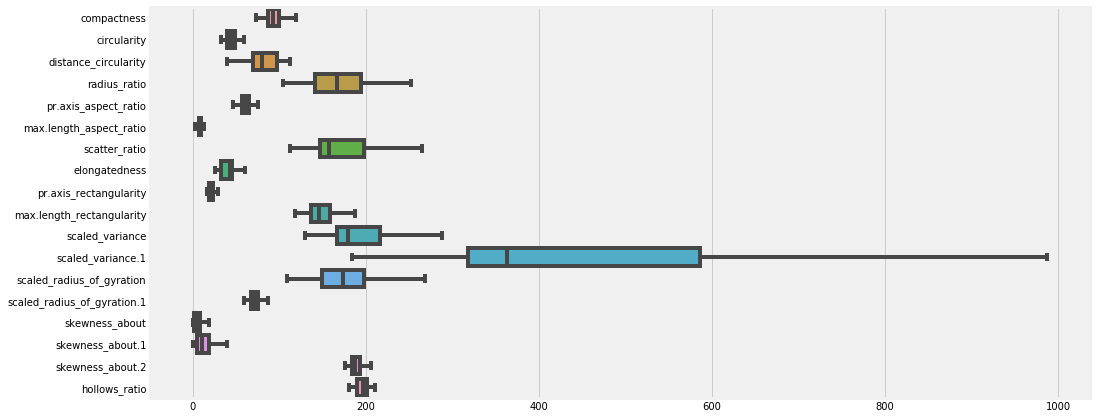

In [65]:
# A quick check to find columns that contain outliers
fig = plt.figure(figsize = (15, 7.2))
ax = sns.boxplot(data = vehicle_im.iloc[:, 0:18], orient = 'h')

#### Observation - Comments after checking outliers and distribution 

<ul>
    <li>Instead of removing the outliers, which might have resulted in loss of data, we first replaced the outliers (using IQR method) with nulls and then used SimpleImputer to replace those nulls with median values.</li>
    <li>Again, there's least effect on means and no effect on (ofcourse) median.</li>
</ul>    

### Multivariate Visualization 

Checking relationship between two or more variables. Includes correlation and scatterplot matrix, checking relation between two variables and target variable.

scatter_ratio                pr.axis_rectangularity         0.989751
pr.axis_rectangularity       scatter_ratio                  0.989751
scaled_variance.1            scatter_ratio                  0.980435
scatter_ratio                scaled_variance.1              0.980435
pr.axis_rectangularity       scaled_variance.1              0.973594
scaled_variance.1            pr.axis_rectangularity         0.973594
scatter_ratio                elongatedness                  0.971601
elongatedness                scatter_ratio                  0.971601
max.length_rectangularity    circularity                    0.961318
circularity                  max.length_rectangularity      0.961318
scaled_variance              scatter_ratio                  0.960883
scatter_ratio                scaled_variance                0.960883
elongatedness                pr.axis_rectangularity         0.948996
pr.axis_rectangularity       elongatedness                  0.948996
elongatedness                scale

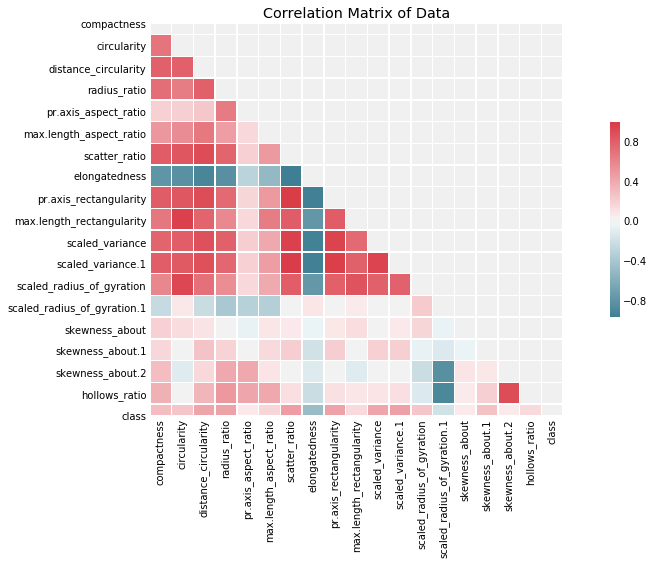

In [66]:
# Correlation matrix for all variables
correlation_matrix(vehicle_im, threshold = 0.8)

In [67]:
# Absolute correlation of independent variables with the target variable
absCorrwithDep = []
allVars = vehicle_im.drop('class', axis = 1).columns

for var in allVars:
    absCorrwithDep.append(abs(vehicle_im['class'].corr(vehicle_im[var])))

display(pd.DataFrame([allVars, absCorrwithDep], index = ['Variable', 'Correlation']).T.\
        sort_values('Correlation', ascending = False))

,Variable,Correlation
7,elongatedness,0.483027
6,scatter_ratio,0.463566
11,scaled_variance.1,0.4516
8,pr.axis_rectangularity,0.444586
3,radius_ratio,0.444101
2,distance_circularity,0.428523
10,scaled_variance,0.420329
0,compactness,0.297774
15,skewness_about.1,0.269542
1,circularity,0.251281


#### Observation  - Correlation matrix 
<ul>

   <li> scatter_ratio and pr.axis_rectangularity; scaled_variance.1 and scatter_ratio; pr.axis_rectangularity and scaled_variance.1; pr.axis_rectangularity and scaled_variance.1; elongatedness and scatter_ratio; circularity and max.length_rectangularity; scaled_variance and scatter_ratio; elongatedness and pr.axis_rectangularity; elongatedness and scaled_variance.1; elongatedness and scaled_variance; pr.axis_rectangularity, scaled_variance and scaled_variance.1; distance_circularity and elongatedness; circularity and scaled_radius_of_gyration; distance_circularity and elongatedness; scatter_ratio and distance_circularity are correlated with each other with a correlation coeff greater than 0.9.</li>
    <li>elongatedness, scatter_ratio, scaled_variance.1, pr.axis_rectangularity and radius_ratio are some columns which have relatively strong correlation with the class variable.</li>
    <li>Though multicollinearity exists between columns, some of those have a strong influence on the target variable as well. For now lets remove max.length_rectangularity, scaled_variance, scaled_radius_of_gyration, distance_circularity, hollows_ratio and skewness_about.2 </li>
    </ul>


In [70]:
vehicle_im.drop(['max.length_rectangularity', 'scaled_variance', 'scaled_radius_of_gyration', 
                 'distance_circularity', 'hollows_ratio', 'skewness_about.2'], axis = 1, inplace = True)

Indeed highly correlated variables ------------------------------------------------------------


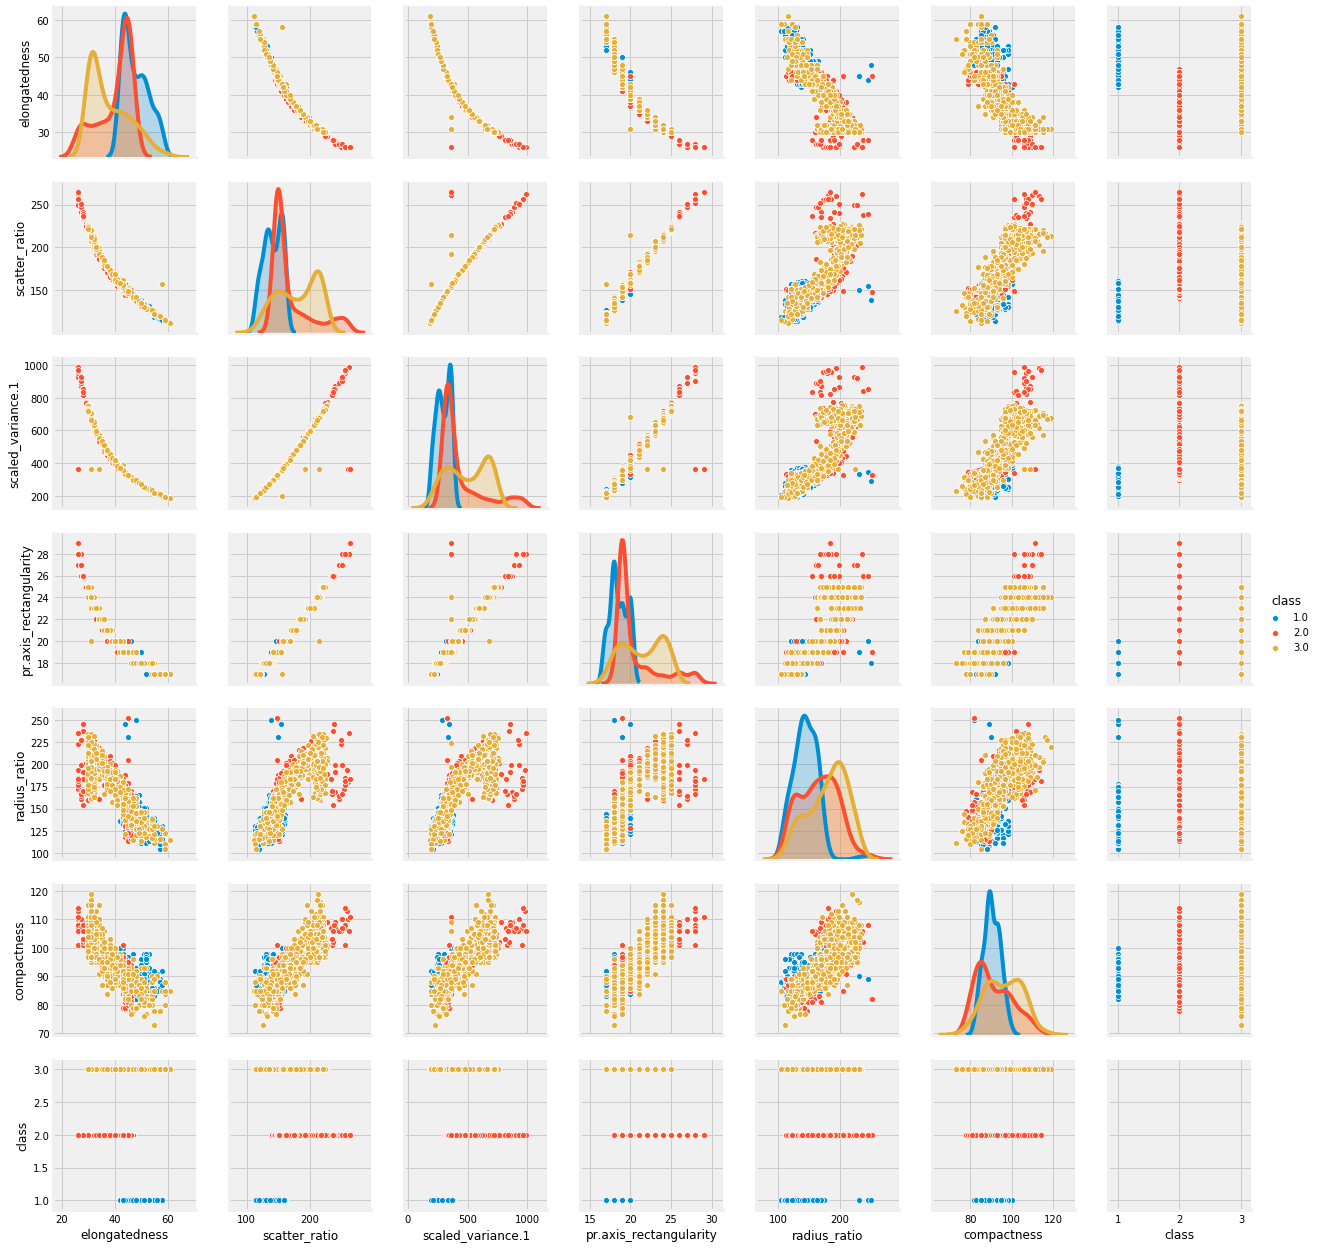

In [71]:
print('Indeed highly correlated variables', '--'*30)
sns.pairplot(vehicle_im[['elongatedness', 'scatter_ratio', 'scaled_variance.1', 
             'pr.axis_rectangularity', 'radius_ratio', 'compactness', 'class']], hue = 'class')

In [ ]:
vehicle_im.shape